In [14]:
# importing libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# data processing 
from textblob import TextBlob 
import re 
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# model selection adn Validation
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



In [15]:
# Reading the data into pandas

training_set = pd.read_csv('train_tweets.csv')
testing_set = pd.read_csv('test_tweets.csv')


In [16]:
training_set = training_set[['label', 'tweet']]
test = testing_set['tweet']

/home/lph4/.environment/TweepyEnv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


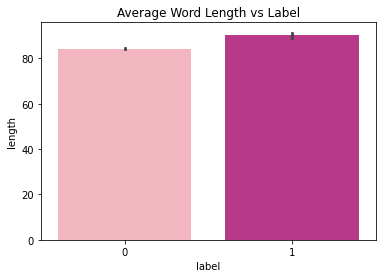

In [17]:
# EDA
training_set['length'] = training_set['tweet'].apply(len)
fig1 = sns.barplot('label', 'length', data = training_set, palette = 'RdPu')
plt.title('Average Word Length vs Label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')



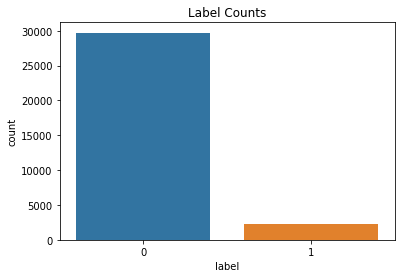

In [18]:
fig2 = sns.countplot(x = 'label', data = training_set)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('count plot.png')

There are differetn insights from the above 2 charts.
1. The lenght of the tweet does nto affect hte classification
2. The data is imbalanced with very little amount of "1"s

# Data processing and feature Engineering

in this case the preprocessign techniques used included:
1. removal of commonly used words
2. removal of puctuations
3. words normalisation

In [19]:
def text_processing(tweet):
    
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)



In [20]:
training_set['tweet_list'] = training_set['tweet'].apply(text_processing)
testing_set['tweet_list'] = testing_set['tweet'].apply(text_processing)


In [21]:
training_set[training_set['label']==1].drop('tweet', axis=1).head()

,label,length,tweet_list
13,1,74,"[cnn, call, michigan, middle, school, wall, ch..."
14,1,101,"[comment, australia, opkillingbay, seashepherd..."
17,1,22,"[retweet, agree]"
23,1,47,"[lumpy, say, prove, lumpy]"
34,1,104,"[unbelievable, century, need, something, like,..."


# Model Selection and Machine Learning

In [22]:
x = training_set['tweet']
y = training_set['label']
test = testing_set['tweet'] 

In [23]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(training_set['tweet'], training_set['label'], test_size=0.2)

In [24]:
#Machine Learning Pipeline
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)



Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7fc276e42af0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [25]:
predictions = pipeline.predict(msg_test)

print(classification_report(predictions, label_test))
print('\n')
print(confusion_matrix(predictions, label_test))
print(accuracy_score(predictions, label_test))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6333
           1       0.13      1.00      0.23        60

    accuracy                           0.94      6393
   macro avg       0.56      0.97      0.60      6393
weighted avg       0.99      0.94      0.96      6393



[[5924  409]
 [   0   60]]
0.9360237760050055


In [26]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)
print(form_sentence(training_set['tweet'].iloc[22]))
print(training_set['tweet'].iloc[10])

product of the day happy man wine tool who 's it 's the weekend time to open up amp drink up
 â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex


In [27]:
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

print(no_user_alpha(form_sentence(training_set['tweet'].iloc[22])))
print(training_set['tweet'].iloc[22])

['product', 'day', 'happy', 'man', 'wine', 'tool', 'weekend', 'time', 'open', 'amp', 'drink']
product of the day: happy man #wine tool  who's   it's the #weekend? time to open up &amp; drink up!


In [28]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends with whom I used to play, when you called me yesterday'.split()
print(normalization(tweet_list))

['I', 'be', 'play', 'with', 'my', 'friends', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']
